In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.datasets import load_iris
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Add code to each of the libraries/dependencies

In [2]:
# Load in data
df = pd.read_csv("Resources/divorce.csv")

# Display the DataFrame
df.head()

,Couple#,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,1,2,2,4,1,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,2,4,4,4,4,4,0,0,4,4,...,2,2,3,4,4,4,4,2,2,1
2,3,2,2,2,2,1,3,2,1,1,...,3,2,3,1,1,1,2,2,2,1
3,4,3,2,3,2,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,5,2,2,1,1,1,1,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [3]:
#Show the total number of divorces (1=yes) and non-divorce (0=no) outcomes
df['Divorce_Y_N'].value_counts()

Divorce_Y_N
0    86
1    84
Name: count, dtype: int64

In [4]:
# Drop all repeative columns
# Clean data
new_df = df.copy()
new_df = new_df.iloc[:, [0, 1, 6, 7, 10, 12, 13, 16, 18, 20, 24, 28, 29, 30, 31, 32, 38, 46, 47, 48, 52, 54, 55]]
new_df.columns


Index(['Couple#', 'Sorry_end', 'No_home_time', '2_strangers', 'common_goals',
       'freeom_value', 'entertain', 'love', 'marriage', 'trust', 'stresses',
       'hopes_wishes', 'know_well', 'friends_social', 'Aggro_argue',
       'Always_never', 'hate_subjects', 'silence_for_harm',
       'silence_fear_anger', 'I'm_right', 'no_hesitancy_inadequate',
       'incompetence', 'Divorce_Y_N'],
      dtype='object')

In [5]:
#Visualization of data
new_df.head(20)

,Couple#,Sorry_end,No_home_time,2_strangers,common_goals,freeom_value,entertain,love,marriage,trust,...,friends_social,Aggro_argue,Always_never,hate_subjects,silence_for_harm,silence_fear_anger,I'm_right,no_hesitancy_inadequate,incompetence,Divorce_Y_N
0,1,2,0,0,0,0,1,1,0,1,...,1,1,2,1,2,1,3,3,1,1
1,2,4,0,0,4,3,4,4,4,2,...,1,0,4,4,2,2,3,4,2,1
2,3,2,3,2,2,4,2,3,3,2,...,2,3,3,1,3,2,3,2,2,1
3,4,3,3,3,3,3,3,3,3,4,...,3,2,3,3,2,2,3,2,2,1
4,5,2,1,0,0,1,0,1,1,1,...,1,1,1,0,2,1,2,2,0,1
5,6,0,2,0,1,2,1,0,1,1,...,0,4,1,2,2,2,1,1,0,1
6,7,3,3,4,2,2,2,3,3,2,...,2,1,2,2,3,2,3,2,2,1
7,8,2,1,0,2,3,2,3,3,1,...,3,1,1,4,0,1,2,1,0,1
8,9,2,4,1,3,3,3,3,3,3,...,3,1,1,2,1,1,1,1,1,1
9,10,1,2,0,2,0,0,0,2,0,...,1,1,1,1,2,0,2,4,3,1


In [6]:
# Drop the label to create the X data

X = new_df.drop("Divorce_Y_N", axis=1)
X

,Couple#,Sorry_end,No_home_time,2_strangers,common_goals,freeom_value,entertain,love,marriage,trust,...,know_well,friends_social,Aggro_argue,Always_never,hate_subjects,silence_for_harm,silence_fear_anger,I'm_right,no_hesitancy_inadequate,incompetence
0,1,2,0,0,0,0,1,1,0,1,...,0,1,1,2,1,2,1,3,3,1
1,2,4,0,0,4,3,4,4,4,2,...,1,1,0,4,4,2,2,3,4,2
2,3,2,3,2,2,4,2,3,3,2,...,3,2,3,3,1,3,2,3,2,2
3,4,3,3,3,3,3,3,3,3,4,...,1,3,2,3,3,2,2,3,2,2
4,5,2,1,0,0,1,0,1,1,1,...,1,1,1,1,0,2,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,166,0,0,0,0,0,0,0,0,0,...,0,0,4,4,0,1,0,4,2,2
166,167,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,4,1,2,3,2
167,168,1,0,0,1,1,1,1,0,1,...,0,1,1,1,1,3,0,2,3,0
168,169,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,3,3,2,4,1


In [7]:
#Create the y set from the "Divorce_Y_N" column

y = new_df["Divorce_Y_N"]
y

0      1
1      1
2      1
3      1
4      1
      ..
165    0
166    0
167    0
168    0
169    0
Name: Divorce_Y_N, Length: 170, dtype: int64

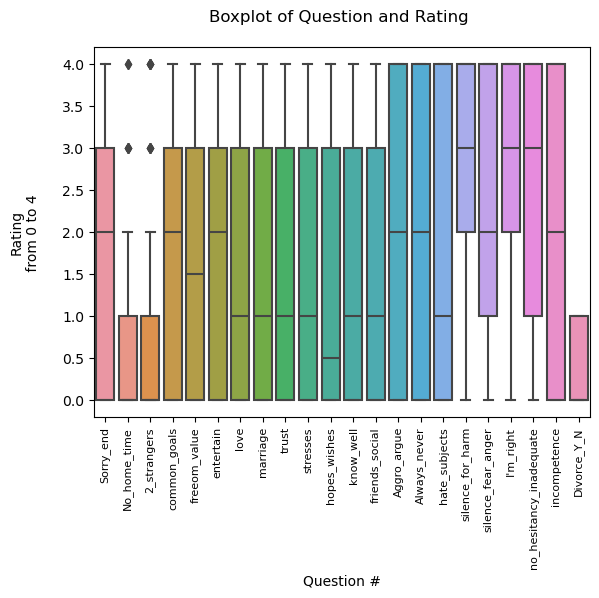

In [9]:
#Boxplot - al
data = new_df.drop("Couple#", axis=1)
sns.boxplot(data)
plt.xticks(fontsize=8, rotation=90)
plt.xlabel('Question #')
plt.ylabel('Rating\n from 0 to 4 \n') 
plt.title( f'Boxplot of Question and Rating \n') 
plt.show()

In [8]:
new_df.head()

,Couple#,Sorry_end,No_home_time,2_strangers,common_goals,freeom_value,entertain,love,marriage,trust,...,friends_social,Aggro_argue,Always_never,hate_subjects,silence_for_harm,silence_fear_anger,I'm_right,no_hesitancy_inadequate,incompetence,Divorce_Y_N
0,1,2,0,0,0,0,1,1,0,1,...,1,1,2,1,2,1,3,3,1,1
1,2,4,0,0,4,3,4,4,4,2,...,1,0,4,4,2,2,3,4,2,1
2,3,2,3,2,2,4,2,3,3,2,...,2,3,3,1,3,2,3,2,2,1
3,4,3,3,3,3,3,3,3,3,4,...,3,2,3,3,2,2,3,2,2,1
4,5,2,1,0,0,1,0,1,1,1,...,1,1,1,0,2,1,2,2,0,1


In [9]:
#scatterplot - eb
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Atr1', y='Atr2', hue='Class', palette='coolwarm')
plt.title('Scatterplot of Atr1 vs Atr2')
plt.xlabel('Atr1')
plt.ylabel('Atr2')
plt.legend(title='Class')
plt.show()

ValueError: Could not interpret value `Atr1` for parameter `x`

<Figure size 1000x600 with 0 Axes>

In [10]:
# highest to lowest -ca
#correlation data
corr = df.corr()['Divorce_Y_N'].drop('Divorce_Y_N')
sort_corr=corr.abs().sort_values(ascending=False)[:20]
sort_corr
corr=df[common].corr()
sns.set(rc={'figure.figsize':(10,4)})
p=sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="plasma")
p.axes.set_title("\nTop 6 Features Corelation Analysis\n",fontsize=20);

NameError: name 'common' is not defined

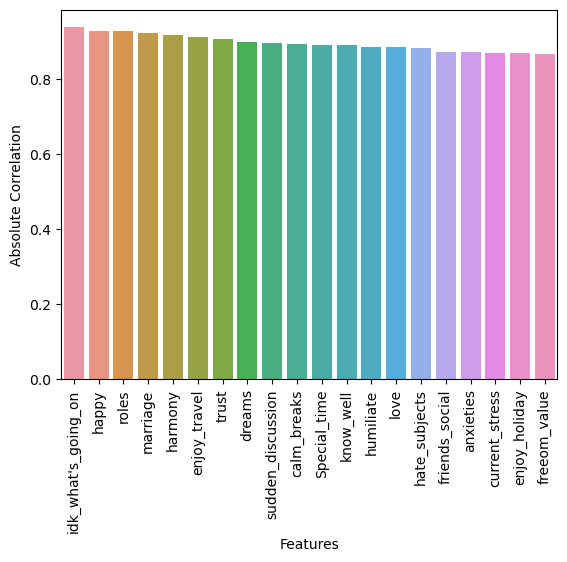

In [11]:
#coorelation / bar chart - Ca
# show bar to compare correlation
sns.barplot(x=sort_corr.index, y=sort_corr)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.show()

In [12]:
# Split the data into training and testing sets using random_state=1

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=1)

In [13]:
# Scale the X data by using StandardScaler()

Scaler = StandardScaler().fit(X_train)
X_train_scale = Scaler.transform(X_train)
X_train_scale


array([[-0.05682364, -1.09451276, -0.82032067, ..., -2.44877613,
        -1.69785764, -0.58350879],
       [-0.85423823,  1.41004798,  1.30581658, ...,  1.11563153,
         0.99749136,  1.22394528],
       [-0.23624192,  1.41004798, -0.82032067, ...,  1.11563153,
        -1.02402039, -1.18599348],
       ...,
       [-0.29604802,  0.78390779,  0.24274795, ...,  0.22452962,
         0.32365411,  0.62146059],
       [ 1.05955679, -1.09451276,  0.24274795, ..., -0.6665723 ,
         0.32365411,  0.0189759 ],
       [-0.99378579,  0.78390779,  0.24274795, ...,  1.11563153,
         0.32365411,  1.22394528]])

In [14]:
# Transform the test dataset based on the fit from the training dataset

X_test_scale = Scaler.transform(X_test)
X_test_scale


array([[-0.77449677,  1.41004798,  1.30581658, -0.56481532,  0.28478735,
         0.26359329,  1.51404804,  0.34648653,  0.3186699 ,  0.38109917,
         0.32718241,  0.49742085,  1.63975507,  0.35551897,  1.17598517,
         1.2054088 ,  1.2557978 ,  1.05964346,  1.08307584,  1.11563153,
         0.99749136,  1.22394528],
       [ 0.08272392, -1.09451276, -0.82032067, -0.56481532, -1.13356534,
        -1.10278825, -1.25262967, -0.98696163, -0.96612621, -0.92699799,
        -1.0351837 , -0.87589324, -0.93121893, -0.99226936, -0.69870249,
        -0.65394648, -1.07246965, -0.40312523, -1.48796401, -0.6665723 ,
        -1.02402039, -1.18599348],
       [-1.35262235,  1.41004798, -0.82032067, -0.56481532,  0.9939637 ,
         1.62997482,  1.51404804,  1.01321061,  1.60346602,  1.68919633,
         1.68954853,  1.18407789,  1.63975507,  1.7033073 ,  1.17598517,
         0.58562371,  0.67373093,  0.32825911,  1.08307584,  0.22452962,
         0.99749136,  1.22394528],
       [-1.03365652

In [15]:
# Create the logistic regression classifier model with a random_state of 1
lr_model = LogisticRegression()

# Fit the model to the training data
lr_model.fit(X_train_scale, y_train)



LogisticRegression()

In [16]:
#K_nearest_neighbors - eb
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, Y_train)
KNeighborsClassifier(n_neighbors=2)
Y_pred = neigh.predict(X_test)


NameError: name 'Y_train' is not defined

In [17]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train_scale, y_train)

clf = clf.fit(iris.data, iris.target)
clf.score(iris.data, iris.target)


NameError: name 'clf' is not defined

In [ ]:
# Create a decision tree graph (exercise 13/3/2) - al


In [18]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train_scale, y_train)


RandomForestClassifier(n_estimators=128, random_state=1)

In [20]:
#heatmap - eb
sns.set(rc={'figure.figsize':(20,10)})
p = sns.heatmap(corr,
               xticklabels=corr.columns,
               yticklabels=corr.columns,
               cmap="YlGnBu", annot=True)
p=p.axes.set_title("Correlation across the first set of eleven 11 features",fontsize=20)



AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
#histogram - eb
features_full={"marriage": "My spouse and I have similar ideas about how marriage 
should be", "idk_what's_going_on" : "We're just starting a discussion before I know 
what's going on.","trust" : "My spouse and I have similar values in trust.","anxieties" : "I 
know my spouse's basic anxieties"}
dfx=df.copy()
dfx["Divorce_Y_N"].replace({0: "Divorced", 1: "Not Divorced"}, inplace=True)
sns.set(rc={'figure.figsize':(24,8)})
plt.subplots_adjust(hspace = 0.4)
for i, column in enumerate(common, 1):
    plt.subplot(1,3,i)
    
p=sns.histplot(x=column,data=dfx,hue="Divorce_Y_N",stat='count',kde=True,palette='
winter')
    p.axes.set_title("\n"+str(features_full[column])+"\n",fontsize=15);

In [21]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Accuracy: {rf_model.score(X_train_scale, y_train)}")
print(f"Testing Accuracy: {rf_model.score(X_test_scale, y_test)}")

print(f"Training Accuracy: {dt_model.score(X_train_scale, y_train)}")
print(f"Testing Accuracy: {dt_model.score(X_test_scale, y_test)}")

print(f"Training Accuracy: {lr_model.score(X_train_scale, y_train)}")
print(f"Testing Accuracy: {lr_model.score(X_test_scale, y_test)}")

#update

Training Accuracy: 1.0
Testing Accuracy: 0.9767441860465116
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Accuracy: 1.0
Testing Accuracy: 0.9767441860465116


In [22]:
# Create a classification report (exercises w/metrics) basic stats from proj 1
classification.plot_model(tuned_lr, plot="feature")


NameError: name 'classification' is not defined

In [ ]:
# Predict values with probabilities - on classifications (ch 13/&&**)